<a href="https://colab.research.google.com/github/prakhar-srivastav/Digit_Classification/blob/master/digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

In [12]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


**Visualize the Data**

Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


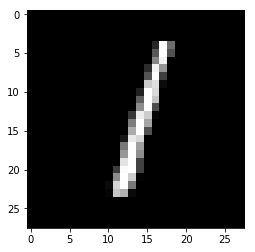

In [13]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

**Design a model**

In [14]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Training a Model**

In [16]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1)

Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.6206 - acc: 0.5900
Epoch 2/5
60000/60000 [==============================] - 2s 25us/step - loss: 0.6378 - acc: 0.8528
Epoch 3/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.4000 - acc: 0.8948
Epoch 4/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.3173 - acc: 0.9144
Epoch 5/5
60000/60000 [==============================] - 2s 26us/step - loss: 0.2659 - acc: 0.9280


In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25322026549577714
Test accuracy: 0.9307


**Prediction**

In [22]:
prediction = model.predict(x_test[0:1])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [1.5214364e-03 1.8315770e-06 1.5937896e-03 1.9283495e-03 1.2749915e-06
 3.4089888e-05 2.1453245e-04 9.9239177e-01 1.4109813e-06 2.3116271e-03]

Thresholded output
 [0 0 0 0 0 0 0 1 0 0]


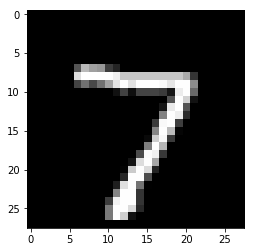

In [24]:
plt.imshow(x_test[0:1].reshape(28,28), cmap='gray')
plt.show()